## Extracting the relevant features that can define a customer churn.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
dataframe=pd.read_csv('/content/drive/My Drive/CustomerChurn_dataset.csv')

In [3]:
dataframe

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


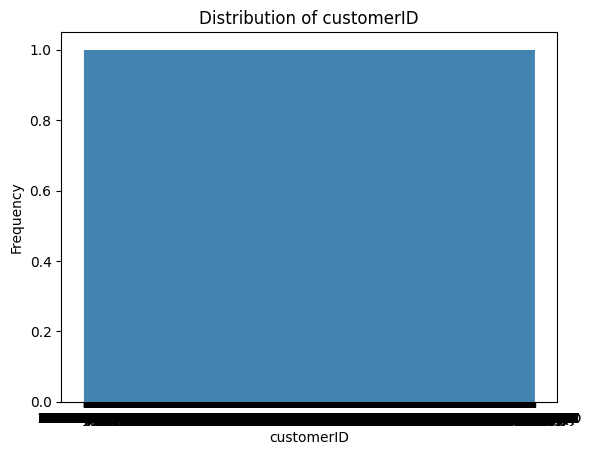

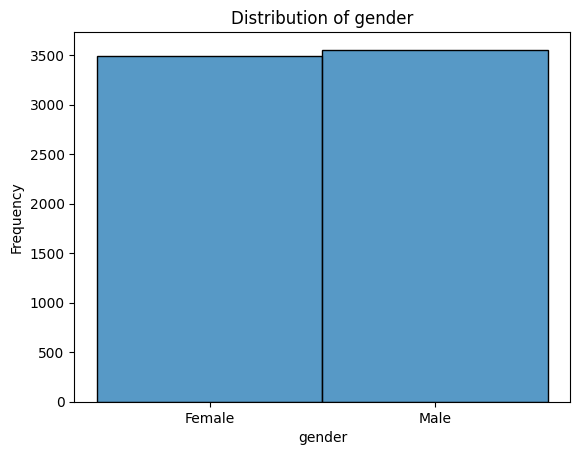

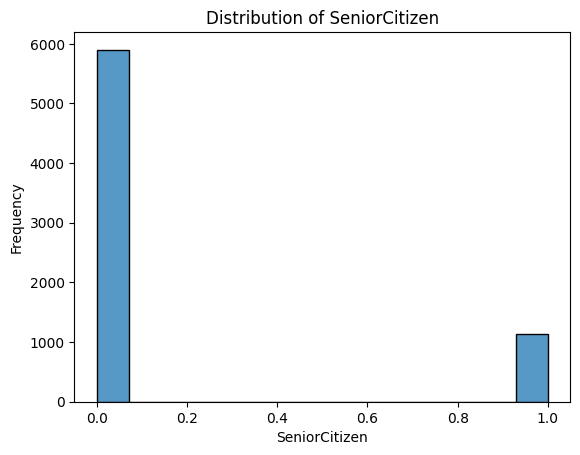

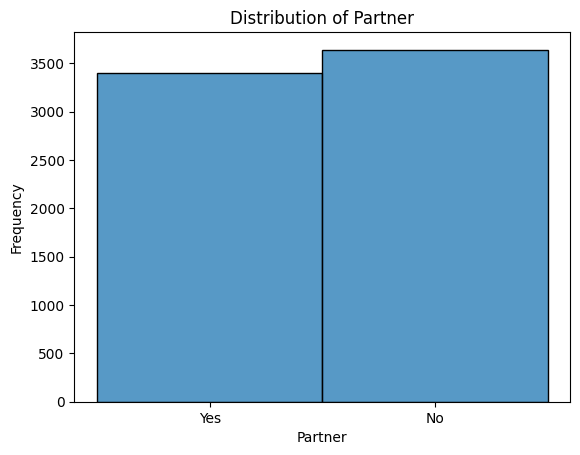

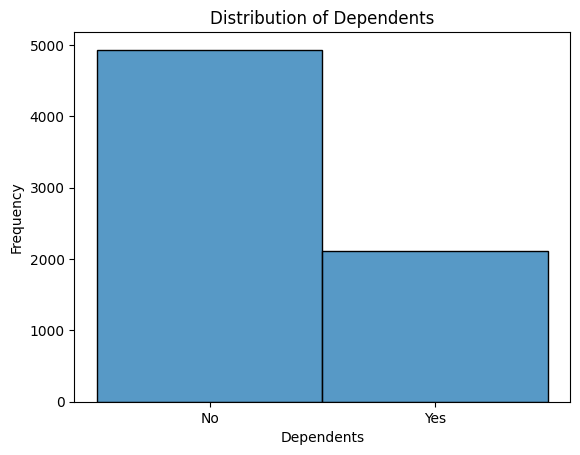

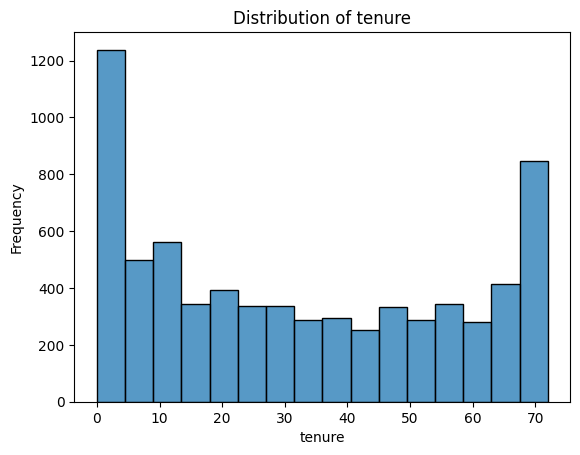

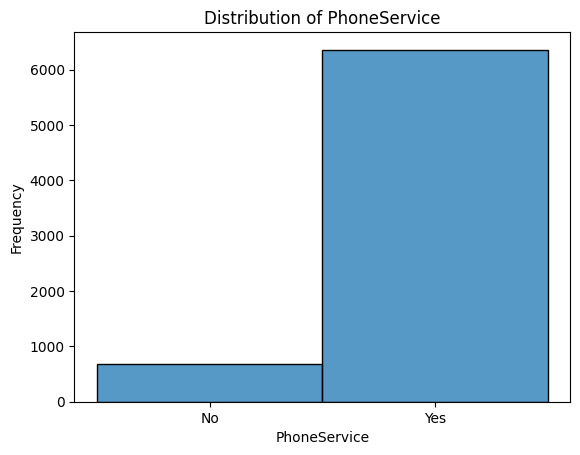

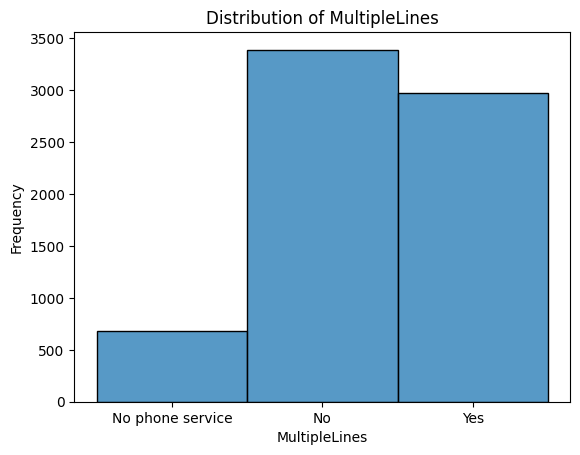

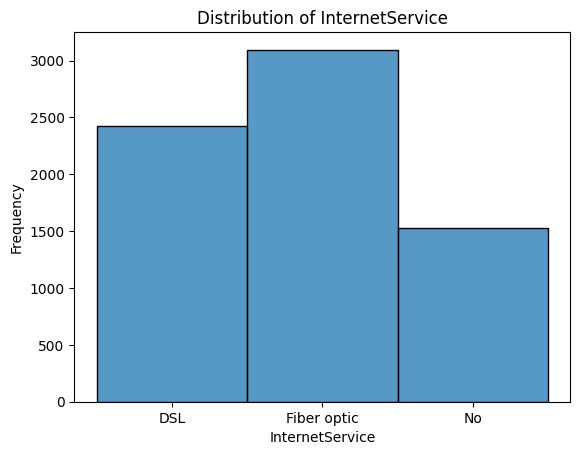

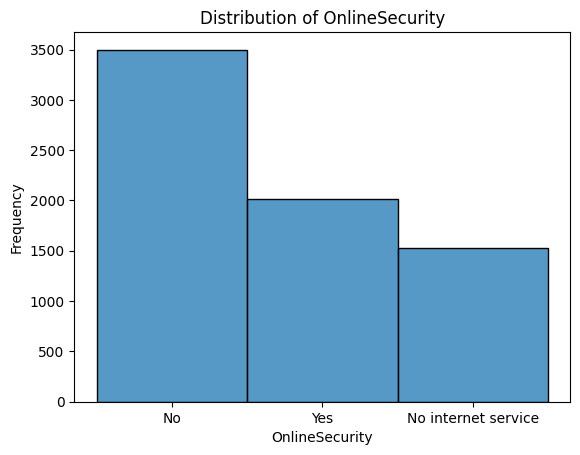

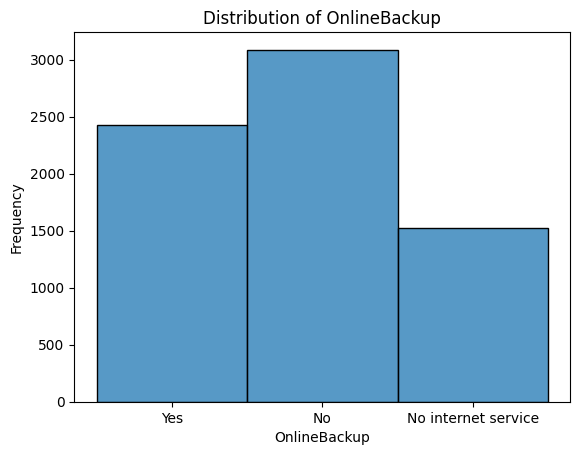

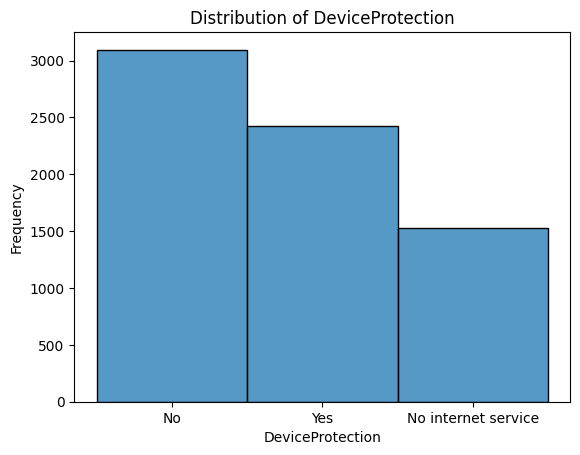

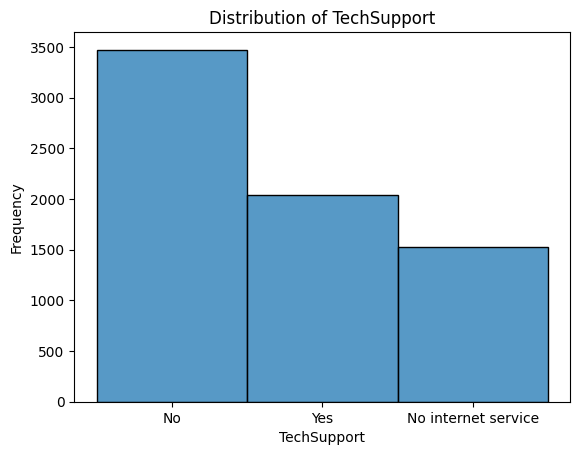

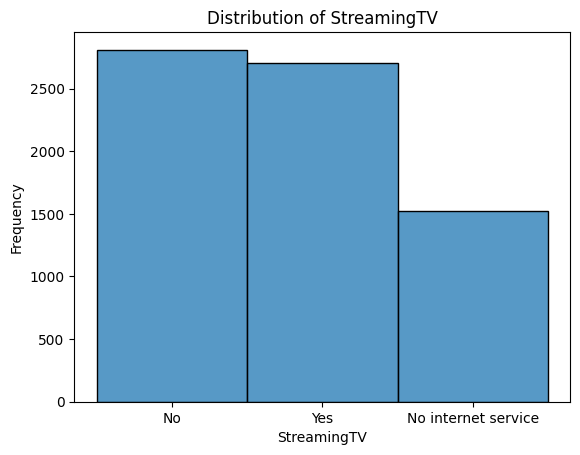

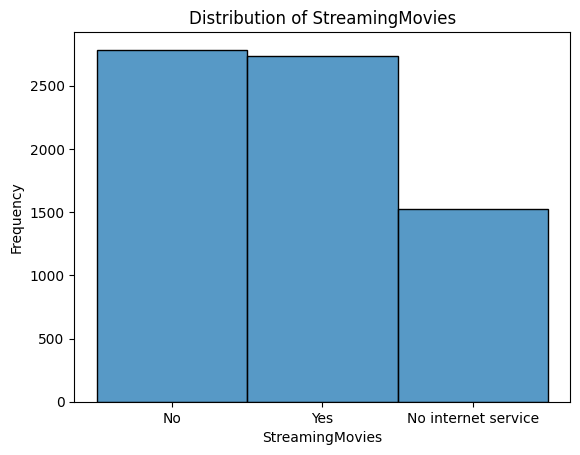

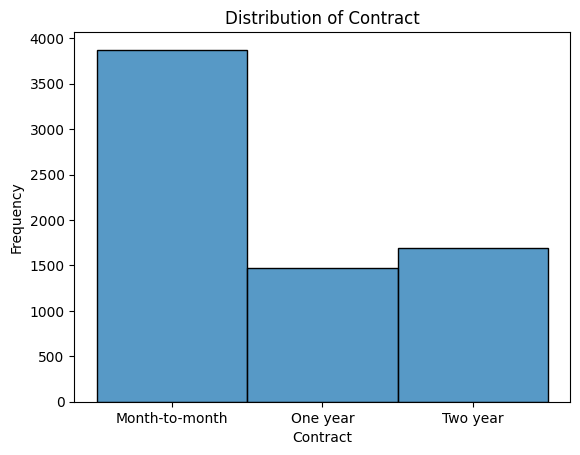

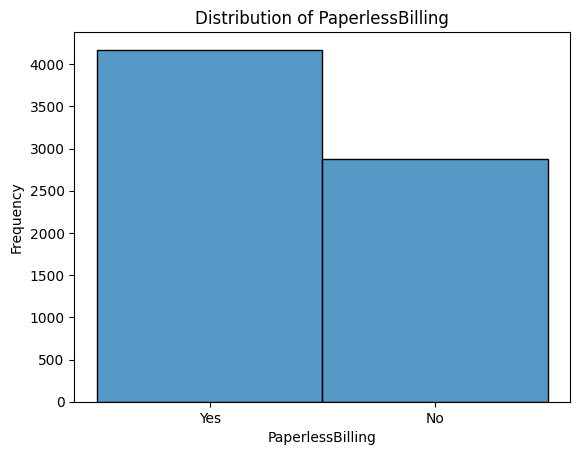

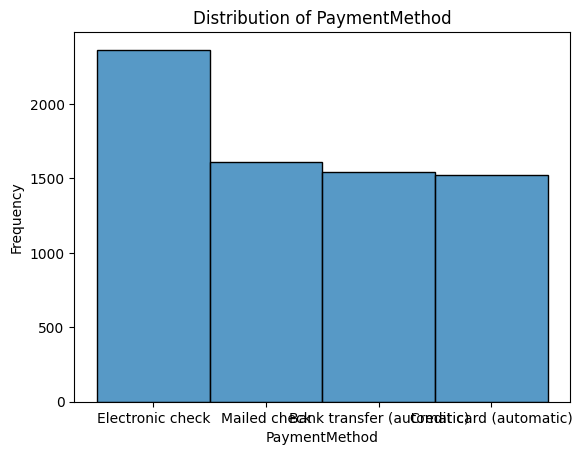

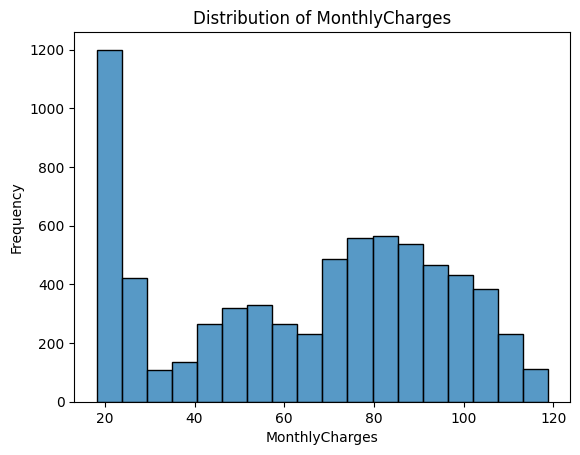

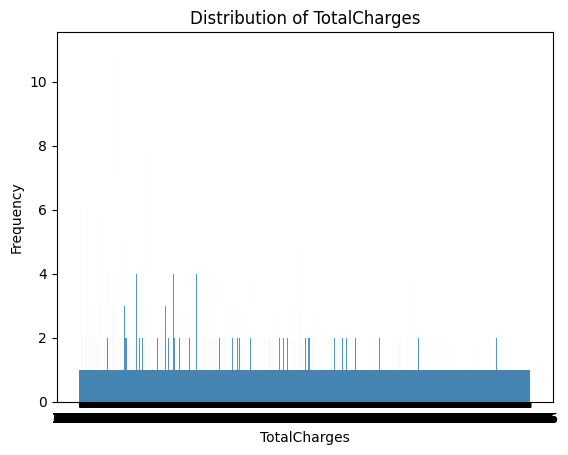

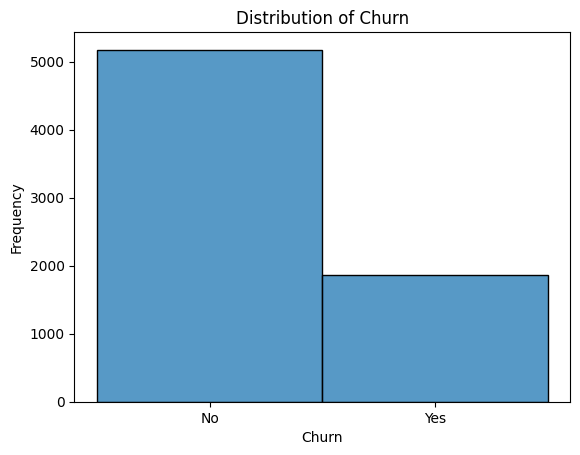

In [4]:
# Display histograms for each column in the DataFrame
for column in dataframe.columns:
    sns.histplot(dataframe[column])
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

In [5]:
#Removing the customer_ID because it does not contain useful information for the prediction task
dataframe.drop('customerID', axis=1, inplace=True)



## **Processing** the dataframe

In [6]:
# Converting the 'TotalCharges' column to numeric, handling errors by coercing non-numeric values to NaN
# and then filling NaN values with 0.
dataframe['TotalCharges'] = pd.to_numeric(dataframe['TotalCharges'], errors='coerce').fillna(0)

# Displaying information about the DataFrame after the conversion
dataframe.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [7]:
# Isolating all numerical & all categorical dataframe
numerical_data = dataframe.select_dtypes(exclude=['object'])
categorical_data= dataframe.select_dtypes(include=['object'])

# factorizing categorical values (turning them into numbers)
categorical_columns = list(categorical_data.columns.values)
for col in categorical_columns:
  categorical_data[col], b = pd.factorize(categorical_data[col])

#  Filling  in the blanks in the numerical columns that is imputing
numerical_data.fillna(numerical_data.mean(), inplace =True)


In [8]:
# Displaying concise information about the 'numerical_data' DataFrame, including data types,
# non-null counts, and memory usage.
numerical_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SeniorCitizen   7043 non-null   int64  
 1   tenure          7043 non-null   int64  
 2   MonthlyCharges  7043 non-null   float64
 3   TotalCharges    7043 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 220.2 KB


In [9]:
# Displaying concise information about the 'categorical_data' DataFrame, including data types,
# non-null counts, and memory usage.
categorical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   gender            7043 non-null   int64
 1   Partner           7043 non-null   int64
 2   Dependents        7043 non-null   int64
 3   PhoneService      7043 non-null   int64
 4   MultipleLines     7043 non-null   int64
 5   InternetService   7043 non-null   int64
 6   OnlineSecurity    7043 non-null   int64
 7   OnlineBackup      7043 non-null   int64
 8   DeviceProtection  7043 non-null   int64
 9   TechSupport       7043 non-null   int64
 10  StreamingTV       7043 non-null   int64
 11  StreamingMovies   7043 non-null   int64
 12  Contract          7043 non-null   int64
 13  PaperlessBilling  7043 non-null   int64
 14  PaymentMethod     7043 non-null   int64
 15  Churn             7043 non-null   int64
dtypes: int64(16)
memory usage: 880.5 KB


In [10]:
# Resetting index for categorical and numerical DataFrames to avoid potential issues
new_categorical_data = categorical_data.reset_index(drop=True)
new_numerical_data = numerical_data.reset_index(drop=True)

# Concatenating categorical and numerical DataFrames along the columns (axis=1)
new_data = pd.concat([new_categorical_data, new_numerical_data], axis=1)


In [11]:
#dispalying the new_data
new_data

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,29.85,29.85
1,1,1,0,1,1,0,1,1,1,0,0,0,1,1,1,0,0,34,56.95,1889.50
2,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,1,0,2,53.85,108.15
3,1,1,0,0,0,0,1,1,1,1,0,0,1,1,2,0,0,45,42.30,1840.75
4,0,1,0,1,1,1,0,1,0,0,0,0,0,0,0,1,0,2,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,2,0,1,1,1,1,1,1,1,0,1,0,0,24,84.80,1990.50
7039,0,0,1,1,2,1,0,0,1,0,1,1,1,0,3,0,0,72,103.20,7362.90
7040,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,11,29.60,346.45
7041,1,0,0,1,2,1,0,1,0,0,0,0,0,0,1,1,1,4,74.40,306.60


In [12]:
# Importing the StandardScaler from scikit-learn for feature scaling
from sklearn.preprocessing import StandardScaler

# Creating an instance of StandardScaler
scaler = StandardScaler()

# Applying the fit_transform method to scale the features in the 'new_data' DataFrame
# The resulting scaled data is stored in 'new_data_scaled'
new_data_scaled = scaler.fit_transform(new_data)


In [13]:
# Selecting the target variable ('Churn') from the DataFrame and assigning it to 'y'
y = new_data['Churn']

# Extracting the features (independent variables) by removing the 'Churn' column
# The resulting DataFrame is assigned to 'X'
X = new_data.drop('Churn', axis=1)



In [14]:
#Displaying the fist columns of X
X.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,29.85,29.85
1,1,1,0,1,1,0,1,1,1,0,0,0,1,1,1,0,34,56.95,1889.50
2,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,2,53.85,108.15
3,1,1,0,0,0,0,1,1,1,1,0,0,1,1,2,0,45,42.30,1840.75
4,0,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,2,70.70,151.65


In [15]:
#Displaying the fist columns of X
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

## **Extract relevant features that relate to churning**


In [16]:
from sklearn.feature_selection import SelectKBest, chi2

In [17]:
# Performing one-hot encoding on categorical variables
X_encoded = pd.get_dummies(X, columns=X.select_dtypes(include=['object']).columns)

# Selecting the top 10 features with the highest information gain
selector = SelectKBest(score_func=chi2, k=10)

# Fiting the selector to the encoded features and target variable
selector.fit(X_encoded, y)

# Geting the mask of selected features
selected_feature_mask = selector.get_support()

# Geting the names of the selected features
selected_features = X_encoded.columns[selected_feature_mask]

# Printing the selected features
print(selected_features)

Index(['OnlineSecurity', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaymentMethod', 'tenure',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')


In [18]:
#Importing the models needed for training
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score


In [19]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   Partner           7043 non-null   int64  
 2   Dependents        7043 non-null   int64  
 3   PhoneService      7043 non-null   int64  
 4   MultipleLines     7043 non-null   int64  
 5   InternetService   7043 non-null   int64  
 6   OnlineSecurity    7043 non-null   int64  
 7   OnlineBackup      7043 non-null   int64  
 8   DeviceProtection  7043 non-null   int64  
 9   TechSupport       7043 non-null   int64  
 10  StreamingTV       7043 non-null   int64  
 11  StreamingMovies   7043 non-null   int64  
 12  Contract          7043 non-null   int64  
 13  PaperlessBilling  7043 non-null   int64  
 14  PaymentMethod     7043 non-null   int64  
 15  SeniorCitizen     7043 non-null   int64  
 16  tenure            7043 non-null   int64  


### Using the features to define and train a Multi-Layer Perceptron model using the Functional API

In [20]:
# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
y_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 5634 entries, 2142 to 860
Series name: Churn
Non-Null Count  Dtype
--------------  -----
5634 non-null   int64
dtypes: int64(1)
memory usage: 88.0 KB


In [22]:
# Defining the input layer
input_layer = Input(shape=(X_train.shape[1],))

In [23]:
# Defining the architecture of the MLP model
hidden_layer1 = Dense(60, activation='relu')(input_layer)
hidden_layer2 = Dense(40, activation='relu')(hidden_layer1)
output_layer = Dense(1, activation='sigmoid')(hidden_layer2)

### Evaluate the model’s accuracy and calculate the AUC score

In [24]:
# Creating the model
model = Model(inputs=input_layer, outputs=output_layer)

# Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [25]:
# Training the model more times
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/100
177/177 [==============================] - 2s 4ms/step - loss: 4.5348 - accuracy: 0.6580 - val_loss: 3.9644 - val_accuracy: 0.7764
Epoch 2/100
177/177 [==============================] - 0s 2ms/step - loss: 2.6945 - accuracy: 0.7093 - val_loss: 4.5573 - val_accuracy: 0.7793
Epoch 3/100
177/177 [==============================] - 1s 3ms/step - loss: 2.0856 - accuracy: 0.7176 - val_loss: 2.7831 - val_accuracy: 0.7686
Epoch 4/100
177/177 [==============================] - 0s 2ms/step - loss: 1.7144 - accuracy: 0.7187 - val_loss: 1.7036 - val_accuracy: 0.7850
Epoch 5/100
177/177 [==============================] - 1s 3ms/step - loss: 3.0469 - accuracy: 0.7220 - val_loss: 4.5698 - val_accuracy: 0.7679
Epoch 6/100
177/177 [==============================] - 0s 2ms/step - loss: 1.7008 - accuracy: 0.7220 - val_loss: 2.3035 - val_accuracy: 0.7814
Epoch 7/100
177/177 [==============================] - 0s 2ms/step - loss: 1.7914 - accuracy: 0.7338 - val_loss: 2.0285 - val_accuracy: 0.7736

In [28]:
# Predicting probabilities on the test set
y_pred_probs = model.predict(X_test)

# Converting probabilities to binary predictions (0 or 1)
y_pred = (y_pred_probs > 0.5).astype(int)

45/45 [==============================] - 0s 1ms/step


In [29]:
# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

Test Accuracy: 80.77%


In [30]:
# Calculating AUC score
auc_score = roc_auc_score(y_test, y_pred_probs)
print(f'AUC Score: {auc_score:.4f}')

AUC Score: 0.8589


In [31]:
!pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 1.8 MB/s eta 0:00:00


In [32]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch

<ipython-input-32-faf0bbded06d>:4: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [33]:
# Loading your data and split it into features (X) and target variable (y)

# Defining the model-building function for Keras Tuner
def build_model(hp):
    model = keras.Sequential()

    # Tuning the number of hidden layers
    for i in range(hp.Int('num_layers', min_value=1, max_value=5, step=1)):
        model.add(layers.Dense(units=hp.Int(f'units_{i}', min_value=32, max_value=512, step=32), activation='relu'))

    model.add(layers.Dense(1, activation='sigmoid'))  # Output layer for binary classification

    # Tuning the learning rate
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

# Initializing the tuner
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,  # Number of hyperparameter combinations to try
    directory='my_tuning_directory',  # Directory to store tuning logs and checkpoints
    project_name='my_tuning_project'  # Name for this tuning project
)

# Performing the search for best hyperparameters
tuner.search(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

# Getting the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Building the final model with the best hyperparameters
final_model = tuner.hypermodel.build(best_hps)

# Training the final model with the full training set
final_model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


Trial 10 Complete [00h 00m 12s]
val_accuracy: 0.7892122268676758

Best val_accuracy So Far: 0.8105039000511169
Total elapsed time: 00h 01m 42s
Epoch 1/10
177/177 [==============================] - 2s 4ms/step - loss: 4.5837 - accuracy: 0.6743 - val_loss: 2.2920 - val_accuracy: 0.7445
Epoch 2/10
177/177 [==============================] - 1s 4ms/step - loss: 3.1017 - accuracy: 0.6951 - val_loss: 0.8057 - val_accuracy: 0.7700
Epoch 3/10
177/177 [==============================] - 1s 4ms/step - loss: 1.5185 - accuracy: 0.7094 - val_loss: 0.5503 - val_accuracy: 0.7743
Epoch 4/10
177/177 [==============================] - 1s 3ms/step - loss: 0.8047 - accuracy: 0.7309 - val_loss: 0.6145 - val_accuracy: 0.7942
Epoch 5/10
177/177 [==============================] - 1s 4ms/step - loss: 1.1843 - accuracy: 0.7258 - val_loss: 0.6689 - val_accuracy: 0.7913
Epoch 6/10
177/177 [==============================] - 1s 4ms/step - loss: 0.7095 - accuracy: 0.7425 - val_loss: 0.8404 - val_accuracy: 0.7757
Epoch

In [34]:
# Printing the best hyperparameters
print("The Best Hyperparameters is:")
print(f"Number of Layers: {best_hps.get('num_layers')}")
for i in range(best_hps.get('num_layers')):
    print(f"  Units in Layer {i}: {best_hps.get(f'units_{i}')}")
print(f"Learning Rate: {best_hps.get('learning_rate')}")


The Best Hyperparameters is:
Number of Layers: 3
  Units in Layer 0: 128
  Units in Layer 1: 352
  Units in Layer 2: 96
Learning Rate: 0.001


In [35]:
# Save the entire model (including architecture, optimizer, and learned weights)
final_model.save('model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
